#   The Spark Foundation - Data Science & Business Analytics Intership 

## TASK 3 : "Exploratory Data Analysis" on dataset "samplesuperstore"

### In this task we will try to findout the weak areas where we can work to make more profit.

## Steps to be followed.

#### 1 importing the libraries 
#### 2  Reading the dataset
#### 3  Data Preprocessing
#### 4  EDA
#### 5  Data Visualization

### Author : Sagar Meena

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Dataset

In [20]:
dataset = pd.read_csv('superstore.xlsx' , sep = '	')

In [21]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing

In [22]:
dataset.shape

(9994, 13)

In [23]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [24]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [39]:
# remove the Unnecessary columns such as postal code
dataset = dataset.drop('Postal Code' , axis = 1)

In [40]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis

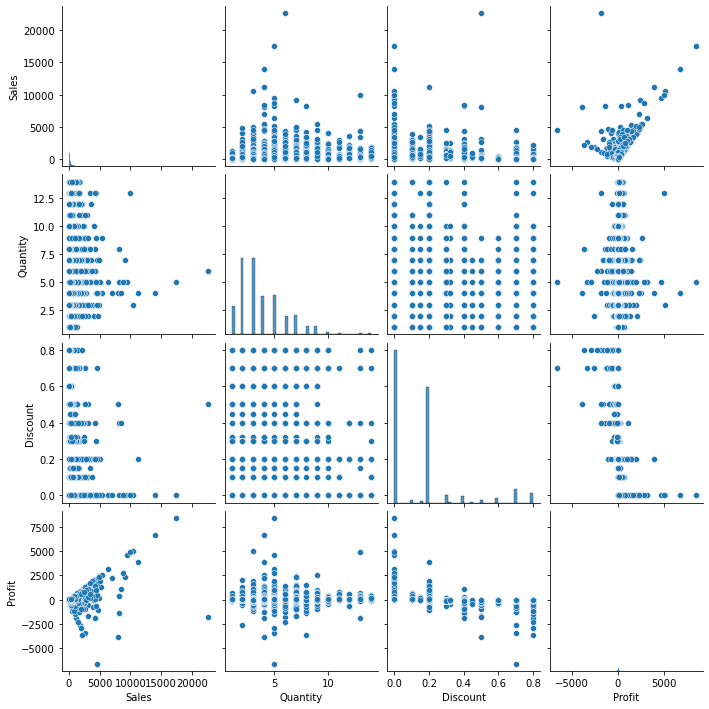

In [50]:
# Visualizing the dataset as a whole using pair plot
import seaborn as sns
sns.pairplot(dataset)

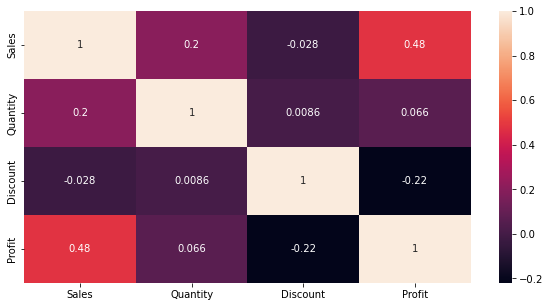

In [52]:
# finding the pairwise correlation between the columns and visualizing using heatmap
dataset.corr()
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr() , annot = True)
plt.show()

## Visualising the categories

([<matplotlib.patches.Wedge at 0x45f02b00>,
 [Text(-0.3496380660429372, 1.0429540846910543, 'Office Supplies'),
  Text(-0.27974354545119656, -1.0638343615330323, 'Furniture'),
  Text(0.9197467277963864, -0.6033787837733774, 'Technology')],
 [Text(-0.1907116723870566, 0.5688840461951205, '60.3%'),
  Text(-0.15258738842792538, -0.5802732881089266, '21.2%'),
  Text(0.5016800333434834, -0.32911570024002396, '18.5%')])

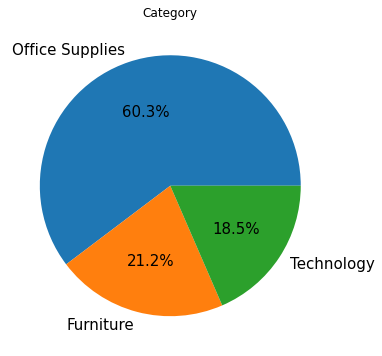

In [56]:
plt.figure(figsize = (6,6))
textprops ={"fontsize":15}
plt.title('Category')
plt.pie(dataset['Category'].value_counts() , labels = dataset['Category'].value_counts().index ,autopct = '%1.1f%%' ,textprops = textprops)

C:\Users\JCS\AppData\Local\conda\conda\envs\rpp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x1152 with 0 Axes>

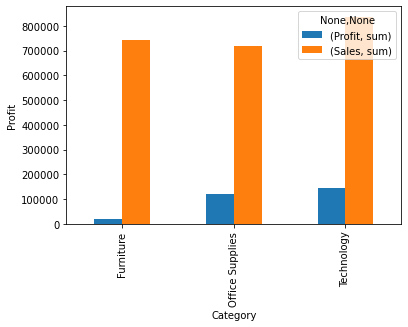

In [57]:
plt.figure(figsize = (10,16))
dataset.groupby('Category')['Profit' , 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

### Visualizing the Subcategories 

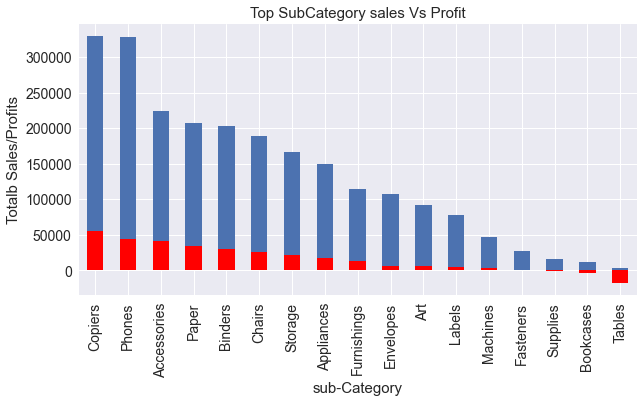

In [59]:
# computing top subcategroies in terms of sale from first 100 obsevation
top_subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n =100)
# computing top subcategories in terms of profit from first 100 observation
top_subcategory_p = dataset.groupby("Sub-Category").Profit.sum().nlargest( n =100)

# now plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar' , figsize= (10,5) ,fontsize = 14)
top_subcategory_p.plot( kind = 'bar' , figsize= (10,5) ,fontsize = 14 , color = 'red' )
plt.xlabel('sub-Category' , fontsize = 15)
plt.ylabel('Totalb Sales/Profits', fontsize = 15)
plt.title("Top SubCategory sales Vs Profit" , fontsize = 15)
plt.show()

### The Above graph clearly shows that Copies and Phones have the Highest Sales and Profit and Table has negative  profit

## Visualizing the Discount

C:\Users\JCS\AppData\Local\conda\conda\envs\rpp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

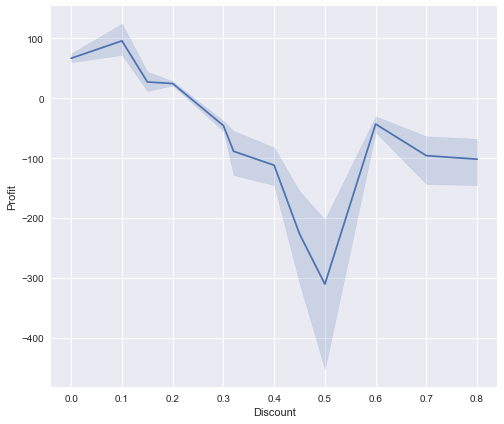

In [60]:
plt.figure(figsize =(8,7))
sns.lineplot(dataset['Discount'] , dataset['Profit'] , data = dataset)

## Visualizing the Sales Vs Profit in Different Region 

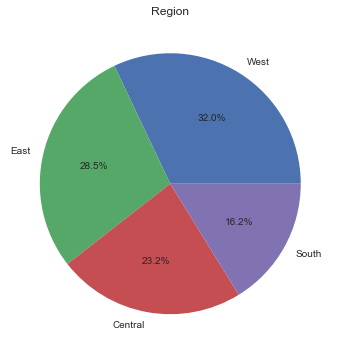

In [64]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(dataset['Region'].value_counts() , labels = dataset['Region'].value_counts().index , autopct = '%1.1f%%')
plt.show()

## the graps show the west and East have same Profit though Sales in the East are less compared to west

## Visualizing the Sales VS Profit in Different States

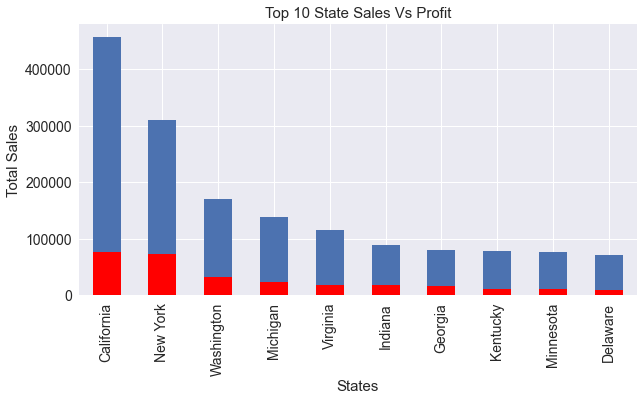

In [65]:
# computing top states in terms of sales from first 10 observation
top_states_s = dataset.groupby("State").Sales.sum().nlargest(n=10)
# computing top states in terms of profit from first 10 observation
top_states_p = dataset.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use("seaborn")
top_states_s.plot( kind = 'bar' ,figsize = (10,5) ,fontsize = 14)
top_states_p.plot( kind = 'bar' ,figsize = (10,5) ,fontsize = 14 ,color = 'red')
plt.xlabel('States' ,fontsize = 15)
plt.ylabel('Total Sales' , fontsize = 15)
plt.title("Top 10 State Sales Vs Profit" , fontsize = 15)
plt.show()


# Checking the independency of sales , profit and Discount

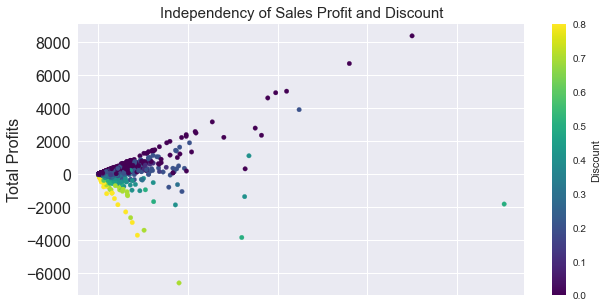

In [69]:
plt.style.use('seaborn')
dataset.plot( kind  = "scatter" , figsize = (10 ,5) , x = "Sales" , y = "Profit" , c = "Discount", s = 20 , fontsize = 16 , colormap = "viridis")
plt.ylabel('Total Profits' , fontsize = 16)
plt.title("Independency of Sales Profit and Discount" , fontsize = 15)

plt.show()

### The graph clearly shows that if we give more discount on product sales increases but profit Decreases

# Conclusion :

## The Weak areas where one can work to make more profit are :

## 1.) We should limits Sales of Furniture and increase that of technology and office supliers as furniture has very less profit as compared to sales.
## 2.)  Considering the subcategories sales of table should be minimized.
## 3.)  Increase sales more in the east as profit is more
## 4.)  we should concentrate on the states like 'New york' and 'California' to make more profit .
